# Stack Overflow Developer Survey 2025 Analysis

**GitHub Repository:** https://github.com/mauriziopinto/stackoverflow-survey-analysis

## Project Overview
This project analyzes the Stack Overflow Developer Survey 2025 data to understand trends in developer careers, AI adoption, and job satisfaction. We follow the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology.

### Business Questions
1. **What factors predict whether a developer perceives AI as a threat to their job?**
2. **How does remote work arrangement affect job satisfaction?**
3. **What characteristics are associated with higher developer salaries?**
4. **What drives AI tool adoption among developers?**

---

## 1. Business Understanding

The Stack Overflow Developer Survey is one of the largest surveys of developers worldwide. Understanding the factors that influence developer careers, job satisfaction, and attitudes toward AI can help:
- **Companies** make better hiring and retention decisions
- **Developers** understand career trends and salary expectations
- **Educators** prepare curriculum for future tech workforce needs

## 2. Data Understanding

### 2.1 Import Libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 100)
%matplotlib inline

print("Libraries imported successfully!")

Libraries imported successfully!


### 2.2 Load Data

In [2]:
# Load the survey data
df = pd.read_csv('survey_results_public.csv', low_memory=False)

# Load the schema for reference
schema = pd.read_csv('survey_results_schema.csv')

print(f"Survey data shape: {df.shape}")
print(f"Number of respondents: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]}")

Survey data shape: (49191, 172)
Number of respondents: 49,191
Number of features: 172


In [3]:
# Preview the data
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,AILearnHow,YearsCode,DevType,OrgSize,ICorPM,RemoteWork,PurchaseInfluence,TechEndorseIntro,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,...,AIAgentChange,AIAgent_Uses,AgentUsesGeneral,AIAgentImpactSomewhat agree,AIAgentImpactNeutral,AIAgentImpactSomewhat disagree,AIAgentImpactStrongly agree,AIAgentImpactStrongly disagree,AIAgentChallengesNeutral,AIAgentChallengesSomewhat disagree,AIAgentChallengesStrongly agree,AIAgentChallengesSomewhat agree,AIAgentChallengesStrongly disagree,AIAgentKnowledge,AIAgentKnowWrite,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,14.0,"Developer, mobile",20 to 99 employees,People manager,Remote,"Yes, I influenced the purchase of a substantia...",Work,10.0,7.0,9.0,6.0,3.0,11.0,12.0,...,Not at all or minimally,Software engineering,NaN,AI agents have increased my productivity.;AI a...,AI agents have helped me automate repetitive t...,NaN,NaN,NaN,I am concerned about the accuracy of the infor...,Integrating AI agents with my existing tools a...,The cost of using certain AI agent platforms i...,NaN,NaN,NaN,NaN,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps,10.0,"Developer, back-end",500 to 999 employees,Individual contributor,"Hybrid (some in-person, leans heavy to flexibi...",No,Personal Project,13.0,1.0,2.0,9.0,4.0,3.0,12.0,...,Not at all or minimally,NaN,NaN,NaN,NaN,NaN,NaN,NaN,It takes significant time and effort to learn ...,NaN,I am concerned about the accuracy of the infor...,Integrating AI agents with my existing tools a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Technical ...,12.0,"Developer, front-end",NaN,NaN,NaN,No,Work,12.0,2.0,3.0,7.0,5.0,10.0,13.0,...,"Yes, somewhat",Software engineering,Multi-platform search enablement,AI agents have increased my productivity.;AI a...,AI agents have improved the quality of my code...,AI agents have improved collaboration within m...,NaN,NaN,It takes significant time and effort to learn ...,My company's IT and/or InfoSec teams have stri...,NaN,I am concerned about the accuracy of the infor...,NaN,Redis,NaN,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",AI CodeGen tools or AI-enabled apps;Videos (no...,5.0,"Developer, back-end","10,000 or mor

In [4]:
# View column names
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['ResponseId', 'MainBranch', 'Age', 'EdLevel', 'Employment', 'EmploymentAddl', 'WorkExp', 'LearnCodeChoose', 'LearnCode', 'LearnCodeAI', 'AILearnHow', 'YearsCode', 'DevType', 'OrgSize', 'ICorPM', 'RemoteWork', 'PurchaseInfluence', 'TechEndorseIntro', 'TechEndorse_1', 'TechEndorse_2', 'TechEndorse_3', 'TechEndorse_4', 'TechEndorse_5', 'TechEndorse_6', 'TechEndorse_7', 'TechEndorse_8', 'TechEndorse_9', 'TechEndorse_13', 'TechEndorse_13_TEXT', 'TechOppose_1', 'TechOppose_2', 'TechOppose_3', 'TechOppose_5', 'TechOppose_7', 'TechOppose_9', 'TechOppose_11', 'TechOppose_13', 'TechOppose_16', 'TechOppose_15', 'TechOppose_15_TEXT', 'Industry', 'JobSatPoints_1', 'JobSatPoints_2', 'JobSatPoints_3', 'JobSatPoints_4', 'JobSatPoints_5', 'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10', 'JobSatPoints_11', 'JobSatPoints_13', 'JobSatPoints_14', 'JobSatPoints_15', 'JobSatPoints_16', 'JobSatPoints_15_TEXT', 'AIThreat', 'NewRole', 'ToolCount

### 2.3 Explore the Schema

In [5]:
# View the schema to understand the questions
schema.head(20)

,qid,qname,question,type,sub,sq_id
0,QID18,TechEndorse_1,What attracts you to a technology or causes yo...,RO,AI integration or AI Agent capabilities,1.0
1,QID18,TechEndorse_2,What attracts you to a technology or causes yo...,RO,Easy-to-use API,2.0
2,QID18,TechEndorse_3,What attracts you to a technology or causes yo...,RO,Robust and complete API,3.0
3,QID18,TechEndorse_4,What attracts you to a technology or causes yo...,RO,Customizable and manageable codebase,4.0
4,QID18,TechEndorse_5,What attracts you to a technology or causes yo...,RO,Reputation for quality,5.0
5,QID18,TechEndorse_6,What attracts you to a technology or causes yo...,RO,Connected to an open-source project,6.0
6,QID18,TechEndorse_7,What attracts you to a technology or causes yo...,RO,Good brand and public image,7.0
7,QID18,TechEndorse_8,What attracts you to a technology or causes yo...,RO,Reliability and low latency,8.0
8,QID18,TechEndorse_9,What attracts you to a technology or causes yo...,RO,Costs are manageable,9.0
9,QID18,TechEndorse_13,What attracts you to a technology or causes yo...,RO,Other (please specify):,10.0


### 2.4 Exploratory Data Analysis (EDA)

In [6]:
# Basic statistics
df.describe()

,ResponseId,WorkExp,YearsCode,TechEndorse_1,TechEndorse_2,TechEndorse_3,TechEndorse_4,TechEndorse_5,TechEndorse_6,TechEndorse_7,TechEndorse_8,TechEndorse_9,TechEndorse_13,TechOppose_1,TechOppose_2,TechOppose_3,TechOppose_5,TechOppose_7,TechOppose_9,TechOppose_11,TechOppose_13,TechOppose_16,TechOppose_15,JobSatPoints_1,JobSatPoints_2,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,JobSatPoints_13,JobSatPoints_14,JobSatPoints_15,JobSatPoints_16,ToolCountWork,ToolCountPersonal,CompTotal,SO_Actions_1,SO_Actions_16,SO_Actions_3,SO_Actions_4,SO_Actions_5,SO_Actions_6,SO_Actions_9,SO_Actions_7,SO_Actions_10,SO_Actions_15,ConvertedCompYearly,JobSat
count,49191.000000,42893.000000,43042.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,35975.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,34259.000000,24943.000000,24943.000000,...,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,24943.000000,27611.000000,25582.000000,2.486600e+04,26260.000000,24340.000000,26260.000000,26260.000000,26260.000000,26260.000000,26260.000000,26260.000000,26260.000000,26260.000000,2.394700e+04,26670.000000
mean,24596.000000,13.367403,16.570861,7.867352,4.104211,4.110271,5.678193,4.119388,5.225990,6.477387,4.370841,4.431661,9.854315,8.307948,4.524067,5.925567,4.991710,4.048980,3.799323,4.365831,5.059867,5.508538,9.945766,6.867738,5.216173,...,8.194965,5.884096,7.367799,6.744658,7.512569,5.703283,8.563324,8.679349,14.687487,7.826685,17.734852,8.545579,2.234198e+70,4.907845,3.339770,5.718355,4.561767,4.790861,5.199657,5.676314,4.984653,7.099505,10.079284,1.017615e+05,7.201950
std,14200.362883,10.800117,11.787610,2.397432,2.275821,2.329536,2.398084,2.437945,2.801045,2.331468,2.357058,2.620901,1.975692,2.202164,2.282867,2.301937,2.294707,2.607443,2.499468,2.557152,2.533541,2.906146,2.087463,3.741490,3.660632,...,3.801257,3.900813,4.118532,3.888845,3.847265,4.110528,3.545288,3.633175,1.898188,4.077460,269.810134,44.664738,3.523096e+72,2.682204,2.411404,2.628016,3.070548,2.643177,2.563562,2.310659,2.490095,2.469394,1.940928,4.617569e+05,1.997245
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,0.000000
25%,12298.500000,5.000000,8.000000,7.000000,2.000000,2.000000,4.000000,2.000000,3.000000,5.000000,2.000000,2.000000,10.000000,8.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,3.000000,10.000000,4.000000,2.000000,...,5.000000,2.000000,4.000000,3.000000,4.000000,2.000000,6.000000,6.000000,15.000000,4.000000,4.000000,3.000000,5.500000e+04,3.000000,1.000000,3.000000,1.000000,3.000000,3.000000,4.000000,3.000000,6.000000,10.000000,3.817100e+04,6.000000
50%,24596.000000,10.000000,14.000000,9.000000,4.000000,4.000000,6.000000,4.000000,5.000000,7.000000,4.000000,4.000000,10.000000,9.000000,4.000000,6.000000,5.000000,4.000000,3.000000,4.000000,5.000000,6.000000,10.000000,6.000000,4.000000,...,8.000000,5.000000,7.000000,6.000000,7.000000,5.000000,9.000000,9.000000,15.000000,8.000000,6.000000,5.000000,1.050000e+05,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,6.000000,5.000000,8.000000,10.000000,7.532000e+04,8.000000
75%,36893.500000,20.000000,24.000000,9.000000,6.000000,6.000000,8.000000,6.000000,8.000000,8.000000,6.000000,7.000000,10.000000,9.000000,6.000000,8.000000,7.000000,6.000000,6.000000,6.000000,7.000000,8.000000,10.000000,10.000000,8.000000,...,11.000000,9.000000,11.000000,10.00

In [7]:
# Check data types
df.dtypes

ResponseId               int64
MainBranch              object
Age                     object
EdLevel                 object
Employment              object
                        ...   
AIAgentExtWrite         object
AIHuman                 object
AIOpen                  object
ConvertedCompYearly    float64
JobSat                 float64
Length: 172, dtype: object

In [8]:
# Check missing values
missing_pct = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("Columns with missing values (top 20):")
print(missing_pct.head(20))

Columns with missing values (top 20):
AIAgentObsWrite         99.463316
SOTagsWant Entry        99.125856
SOTagsHaveEntry         99.068935
AIModelsWantEntry       99.034376
AIAgentOrchWrite        99.028278
JobSatPoints_15_TEXT    98.650160
AIAgentKnowWrite        98.442805
AIModelsHaveEntry       98.422476
SO_Actions_15_TEXT      98.326930
AIAgentExtWrite         98.253746
CommPlatformWantEntr    97.593056
CommPlatformHaveEntr    96.999451
DatabaseWantEntry       96.883576
OfficeStackWantEntry    96.712813
TechOppose_15_TEXT      96.651827
TechEndorse_13_TEXT     95.915920
DevEnvWantEntry         95.706532
DatabaseHaveEntry       95.629282
OfficeStackHaveEntry    94.736842
WebframeWantEntry       94.653494
dtype: float64


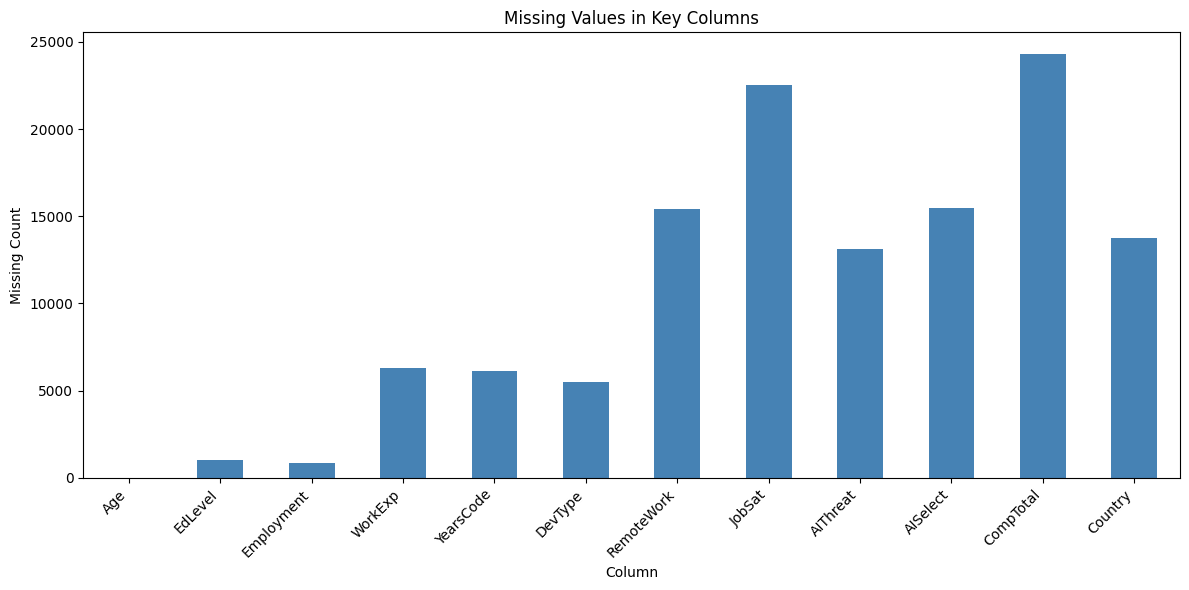

In [9]:
# Visualize missing data for key columns
key_columns = ['Age', 'EdLevel', 'Employment', 'WorkExp', 'YearsCode', 
               'DevType', 'RemoteWork', 'JobSat', 'AIThreat', 'AISelect', 
               'CompTotal', 'Country']

missing_key = df[key_columns].isnull().sum()

plt.figure(figsize=(12, 6))
missing_key.plot(kind='bar', color='steelblue')
plt.title('Missing Values in Key Columns')
plt.xlabel('Column')
plt.ylabel('Missing Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Age Distribution

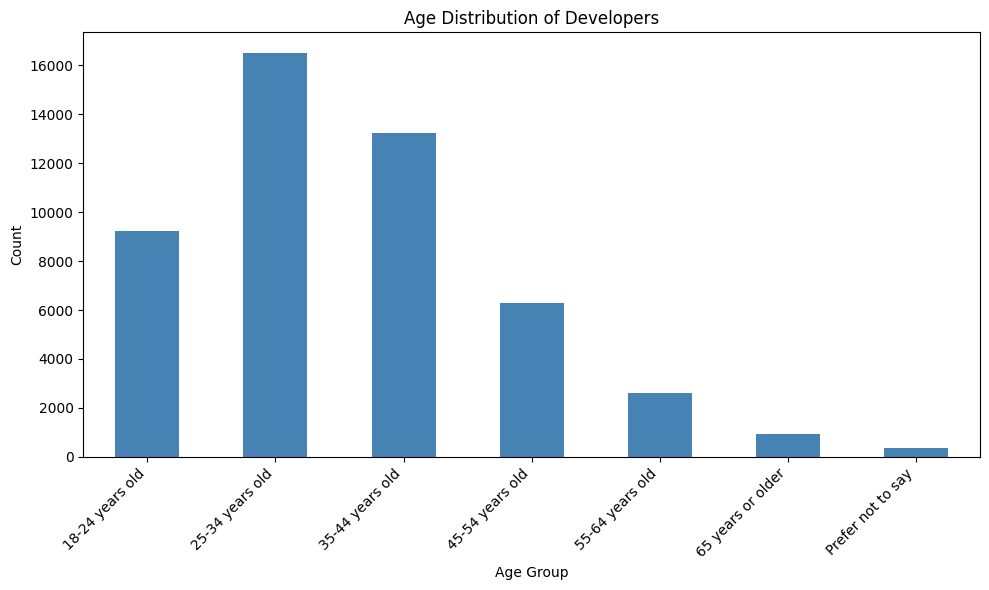

In [10]:
# Age distribution
plt.figure(figsize=(10, 6))
df['Age'].value_counts().sort_index().plot(kind='bar', color='steelblue')
plt.title('Age Distribution of Developers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Education Level Distribution

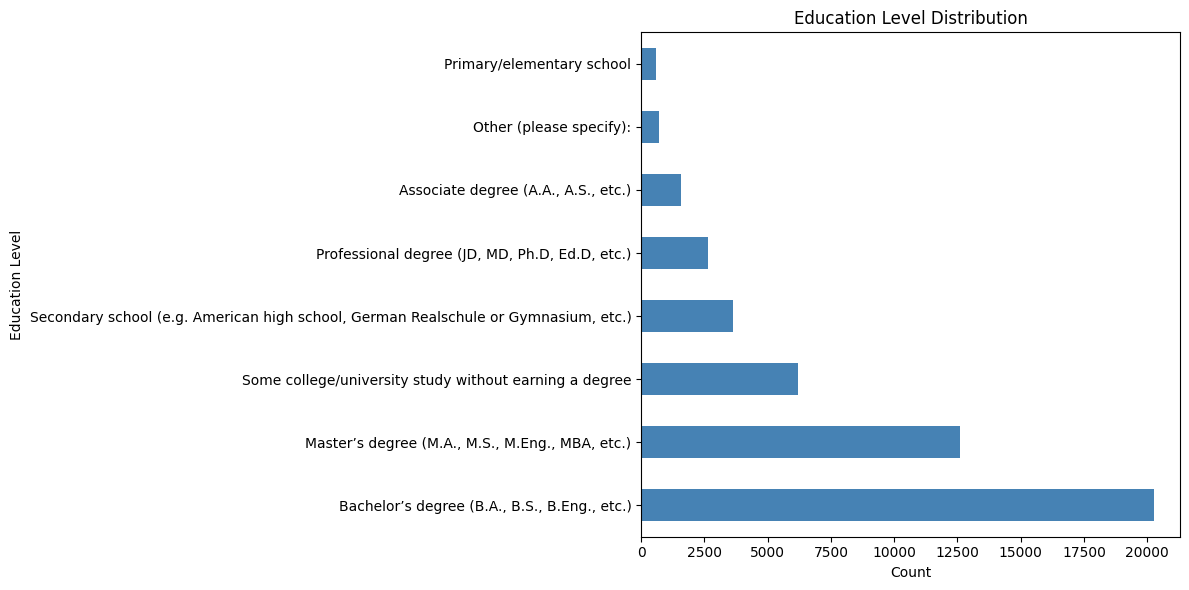

In [11]:
# Education level distribution
plt.figure(figsize=(12, 6))
df['EdLevel'].value_counts().plot(kind='barh', color='steelblue')
plt.title('Education Level Distribution')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Remote Work Distribution

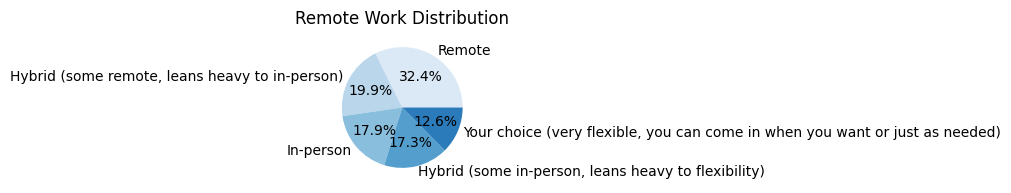

In [12]:
# Remote work distribution
plt.figure(figsize=(8, 6))
df['RemoteWork'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Blues'))
plt.title('Remote Work Distribution')
plt.ylabel('')
plt.tight_layout()
plt.show()

#### AI Threat Perception

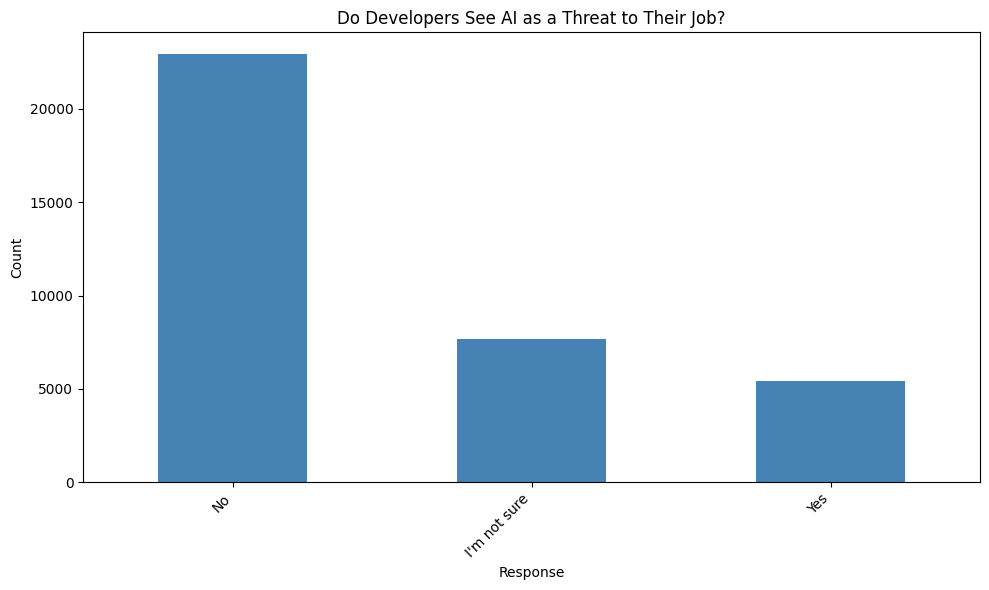

In [13]:
# AI Threat perception
plt.figure(figsize=(10, 6))
df['AIThreat'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Do Developers See AI as a Threat to Their Job?')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Job Satisfaction Distribution

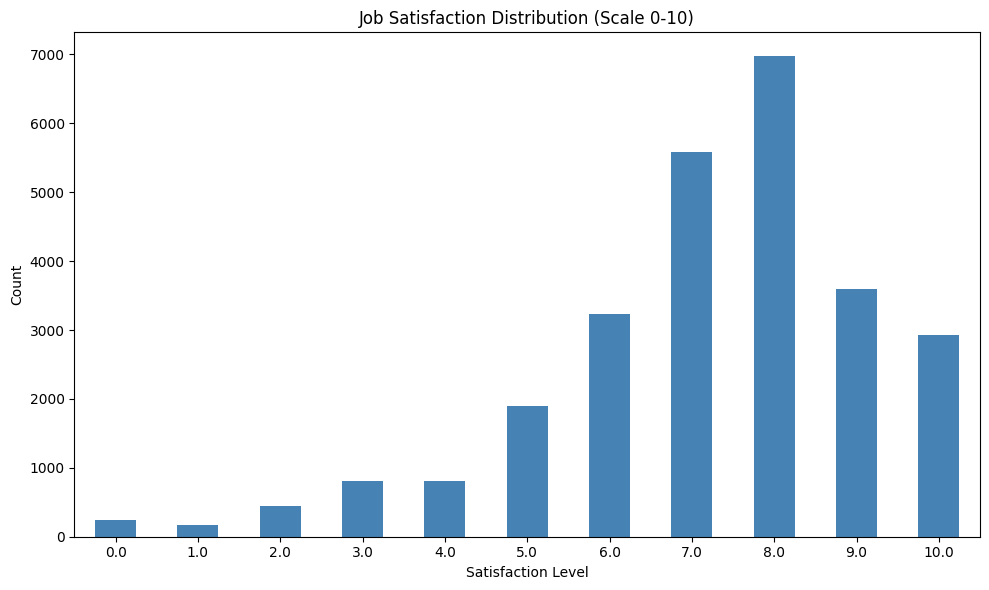


Mean Job Satisfaction: 7.20
Median Job Satisfaction: 8.0


In [14]:
# Job satisfaction distribution (scale 0-10)
plt.figure(figsize=(10, 6))
job_sat_counts = df['JobSat'].value_counts().sort_index()
job_sat_counts.plot(kind='bar', color='steelblue')
plt.title('Job Satisfaction Distribution (Scale 0-10)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"\nMean Job Satisfaction: {df['JobSat'].mean():.2f}")
print(f"Median Job Satisfaction: {df['JobSat'].median():.1f}")

---

## 3. Data Preparation

### 3.1 Handle Missing Values

In [15]:
def clean_data(df, columns, drop_na=True):
    """
    Clean the dataframe by selecting specific columns and handling missing values.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe
    columns : list
        List of columns to keep
    drop_na : bool
        Whether to drop rows with missing values
    
    Returns:
    --------
    pandas.DataFrame
        Cleaned dataframe
    """
    df_clean = df[columns].copy()
    
    if drop_na:
        df_clean = df_clean.dropna()
    
    print(f"Original shape: {df.shape}")
    print(f"Cleaned shape: {df_clean.shape}")
    print(f"Rows removed: {df.shape[0] - df_clean.shape[0]:,}")
    
    return df_clean

### 3.2 Encode Categorical Variables

In [16]:
def encode_categorical(df, columns):
    """
    Encode categorical variables using LabelEncoder.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input dataframe
    columns : list
        List of categorical columns to encode
    
    Returns:
    --------
    pandas.DataFrame, dict
        Encoded dataframe and dictionary of encoders
    """
    df_encoded = df.copy()
    encoders = {}
    
    for col in columns:
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
        encoders[col] = le
    
    return df_encoded, encoders

### Why This Encoding Approach?

**LabelEncoder** was used for categorical variables in this analysis. Here's why this approach was chosen:

**Rationale for LabelEncoder:**
- **Tree-based models compatibility:** Random Forest (our chosen model) handles label-encoded categorical values well without assuming ordinal relationships between categories
- **Memory efficiency:** Unlike one-hot/dummy encoding which creates many new columns, LabelEncoder keeps the feature space compact
- **Works with string processing:** By converting to strings first (`astype(str)`), we handle any missing or unexpected values gracefully

**Why NOT Dummy Encoding (pd.get_dummies):**
- Dummy encoding would prevent the model from assuming unintended mathematical order in categories, BUT it creates high-dimensional sparse data for features like `DevType` (which has many unique values)
- For tree-based models specifically, the ordinal assumption concern is minimal since decision trees split on individual values rather than treating the encoded numbers as continuous

**Trade-offs acknowledged:**
- For linear models (e.g., Logistic Regression), dummy encoding would be preferred to avoid false ordinal assumptions
- Target encoding could be considered for high-cardinality features like `DevType` in future iterations

---

## 4. Analysis and Modeling

### Question 1: What factors predict whether a developer perceives AI as a threat to their job?

In [ ]:
# Select relevant columns for AI threat prediction
ai_threat_cols = ['AIThreat', 'Age', 'EdLevel', 'WorkExp', 'YearsCode', 
                  'RemoteWork', 'AISelect', 'DevType']

# Clean data
df_ai_threat = clean_data(df, ai_threat_cols)

### Handling Missing Values in AIThreat Model

**Decision:** Rows with missing values were dropped to ensure model quality and reliability.

**Rationale:**
- Machine learning models like Random Forest cannot handle missing values directly
- The AIThreat variable is our target, and imputing the target variable would introduce artificial patterns that don't reflect real responses
- We require complete cases for all predictor variables to ensure each training example has valid feature information

**Potential Bias:**
- Dropping rows reduces the sample size from 49,191 to 25,612 (~48% reduction)
- This may introduce **non-response bias** - respondents who answer all questions may differ systematically from those who skip questions
- For example, developers with strong opinions about AI (positive or negative) may be more likely to complete the entire survey
- Results should be interpreted as applicable to "complete survey respondents" rather than all developers

In [18]:
# Explore AI threat responses
print("AI Threat Response Distribution:")
print(df_ai_threat['AIThreat'].value_counts())

AI Threat Response Distribution:
AIThreat
No              16972
I'm not sure     5203
Yes              3437
Name: count, dtype: int64


In [19]:
# Create binary target: 1 = sees AI as threat, 0 = does not
# Adjust based on actual values in the data
df_ai_threat['AIThreat_Binary'] = df_ai_threat['AIThreat'].apply(
    lambda x: 1 if 'Yes' in str(x) else 0
)

print("Binary AI Threat Distribution:")
print(df_ai_threat['AIThreat_Binary'].value_counts())

Binary AI Threat Distribution:
AIThreat_Binary
0    22175
1     3437
Name: count, dtype: int64


In [20]:
# Encode categorical variables
cat_cols = ['Age', 'EdLevel', 'RemoteWork', 'AISelect', 'DevType']
df_ai_encoded, ai_encoders = encode_categorical(df_ai_threat, cat_cols)

# Convert numeric columns
df_ai_encoded['WorkExp'] = pd.to_numeric(df_ai_encoded['WorkExp'], errors='coerce')
df_ai_encoded['YearsCode'] = pd.to_numeric(df_ai_encoded['YearsCode'], errors='coerce')
df_ai_encoded = df_ai_encoded.dropna()

In [21]:
# Prepare features and target
feature_cols = ['Age', 'EdLevel', 'WorkExp', 'YearsCode', 'RemoteWork', 'AISelect', 'DevType']
X = df_ai_encoded[feature_cols]
y = df_ai_encoded['AIThreat_Binary']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]:,}")
print(f"Test set size: {X_test.shape[0]:,}")

Training set size: 20,489
Test set size: 5,123


In [22]:
# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

# Predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation:
Accuracy: 0.8372

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      4404
           1       0.14      0.03      0.05       719

    accuracy                           0.84      5123
   macro avg       0.50      0.50      0.48      5123
weighted avg       0.76      0.84      0.79      5123



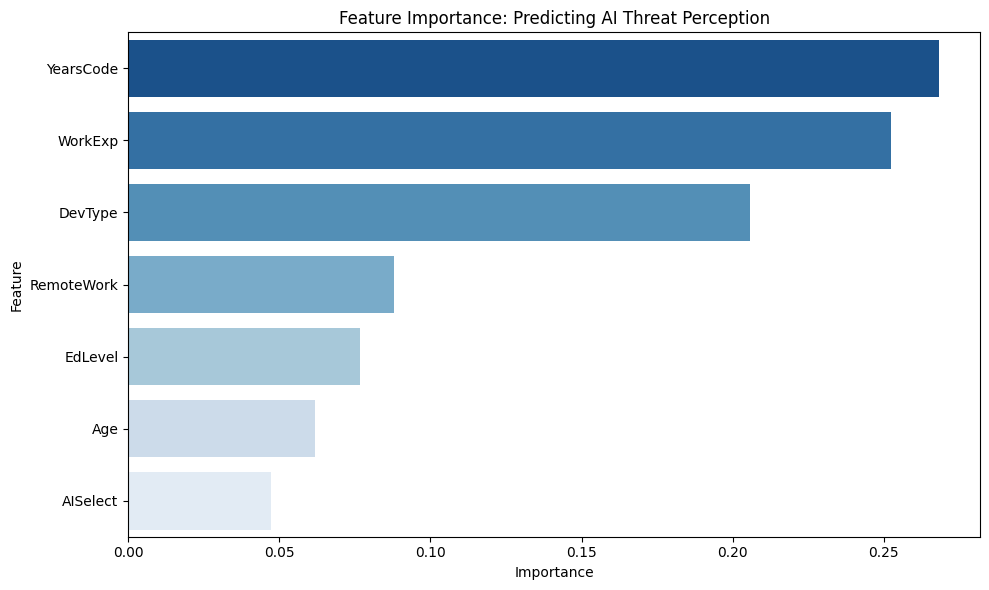


Feature Importance Ranking:
      Feature  Importance
3   YearsCode    0.268362
2     WorkExp    0.252439
6     DevType    0.205684
4  RemoteWork    0.087806
1     EdLevel    0.076592
0         Age    0.061759
5    AISelect    0.047358


In [23]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_classifier.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='Blues_r')
plt.title('Feature Importance: Predicting AI Threat Perception')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance)

### Question 2: How does remote work arrangement affect job satisfaction?

In [24]:
# Select relevant columns
remote_cols = ['RemoteWork', 'JobSat']
df_remote = clean_data(df, remote_cols)

Original shape: (49191, 172)
Cleaned shape: (22797, 2)
Rows removed: 26,394


In [25]:
# Mean job satisfaction by remote work arrangement
remote_satisfaction = df_remote.groupby('RemoteWork')['JobSat'].agg(['mean', 'median', 'count'])
remote_satisfaction = remote_satisfaction.sort_values('mean', ascending=False)
print("Job Satisfaction by Remote Work Arrangement:")
print(remote_satisfaction.round(2))

Job Satisfaction by Remote Work Arrangement:
                                                    mean  median  count
RemoteWork                                                             
Your choice (very flexible, you can come in whe...  7.43     8.0   2848
Remote                                              7.32     8.0   7908
Hybrid (some in-person, leans heavy to flexibil...  7.21     8.0   4046
Hybrid (some remote, leans heavy to in-person)      7.08     7.0   4499
In-person                                           6.99     7.0   3496


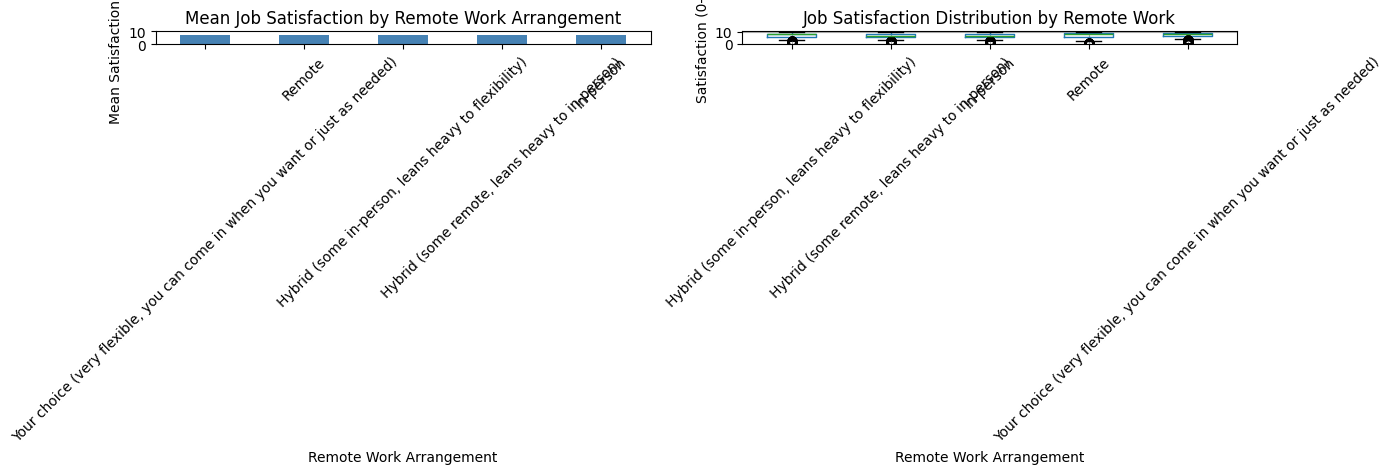

In [26]:
# Visualization - Mean Job Satisfaction by Remote Work
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of mean satisfaction
remote_satisfaction['mean'].plot(kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Mean Job Satisfaction by Remote Work Arrangement')
axes[0].set_xlabel('Remote Work Arrangement')
axes[0].set_ylabel('Mean Satisfaction (0-10)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 10)

# Box plot for distribution
df_remote.boxplot(column='JobSat', by='RemoteWork', ax=axes[1])
axes[1].set_title('Job Satisfaction Distribution by Remote Work')
axes[1].set_xlabel('Remote Work Arrangement')
axes[1].set_ylabel('Satisfaction (0-10)')
axes[1].tick_params(axis='x', rotation=45)
plt.suptitle('')  # Remove automatic title

plt.tight_layout()
plt.show()

### Handling Missing Salary Data

**Observation:** The salary data (`CompTotal`) has significant missingness - approximately 51% of respondents did not provide salary information.

**Decision:** Salaries with missing values were **dropped** rather than imputed.

**Rationale:**
- **Salary is highly context-dependent:** Compensation varies significantly based on country, cost of living, industry, and negotiation skills. Imputing median or mean values would not reflect this complexity
- **Could introduce artificial noise:** Any imputation method (mean/median/more sophisticated) would create synthetic salary data that doesn't represent real market rates for specific individuals
- **Preserves data integrity:** By analyzing only reported salaries, we avoid making assumptions that could distort the "higher developer salaries" conclusions

**Impact on conclusions:**
- The salary analysis is based on 5,893 USD-earning respondents (about 12% of total survey responses)
- **Selection bias possible:** Developers willing to share salary information may differ from those who don't (e.g., higher earners may be more willing to disclose)
- **USD restriction:** Limiting to USD earners ensures consistency but excludes global salary patterns - conclusions about "higher developer salaries" apply specifically to US-based developers
- Results should be interpreted as trends among "developers who disclose USD salaries" rather than universal truths

### Question 3: What characteristics are associated with higher developer salaries?

In [27]:
# Select relevant columns for salary analysis
# Focus on USD for consistency
salary_cols = ['CompTotal', 'Currency', 'Country', 'EdLevel', 'YearsCode',
               'WorkExp', 'DevType', 'OrgSize', 'RemoteWork']

df_salary = df[salary_cols].copy()

# Filter for USD salaries and reasonable range
df_salary_usd = df_salary[df_salary['Currency'] == 'USD United States dollar'].copy()
df_salary_usd['CompTotal'] = pd.to_numeric(df_salary_usd['CompTotal'], errors='coerce')

# Filter outliers (salaries between $10k and $500k)
df_salary_usd = df_salary_usd[
    (df_salary_usd['CompTotal'] >= 10000) &
    (df_salary_usd['CompTotal'] <= 500000)
].dropna(subset=['CompTotal'])

print(f"Salary analysis sample size: {len(df_salary_usd):,}")
print(f"\nSalary Statistics (USD):")
print(df_salary_usd['CompTotal'].describe())

Salary analysis sample size: 5,893

Salary Statistics (USD):
count      5893.000000
mean     146866.185814
std       84072.011327
min       10000.000000
25%       90000.000000
50%      140000.000000
75%      190000.000000
max      500000.000000
Name: CompTotal, dtype: float64


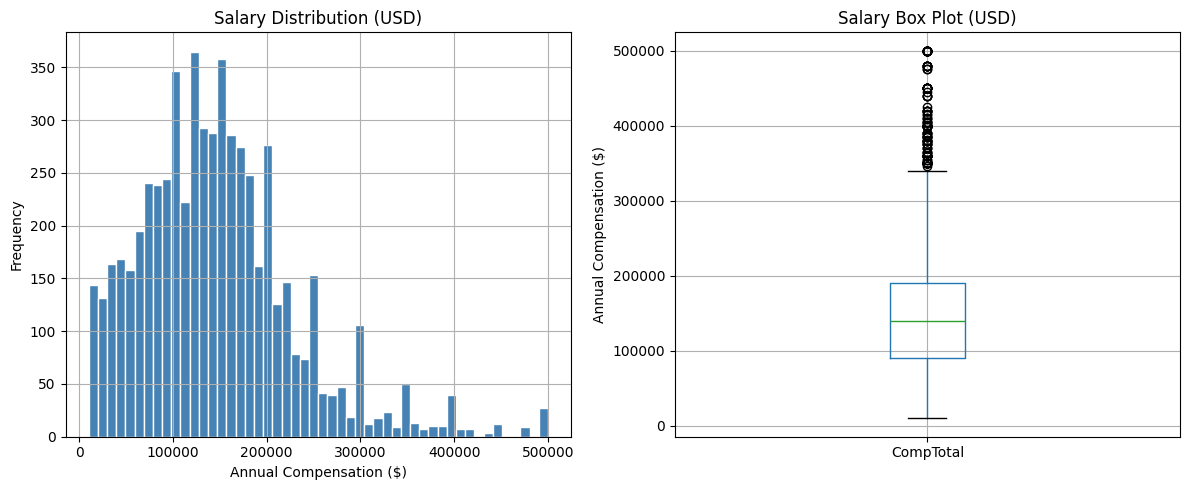

In [28]:
# Salary distribution
if len(df_salary_usd) > 0:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    df_salary_usd['CompTotal'].hist(bins=50, color='steelblue', edgecolor='white')
    plt.title('Salary Distribution (USD)')
    plt.xlabel('Annual Compensation ($)')
    plt.ylabel('Frequency')

    plt.subplot(1, 2, 2)
    df_salary_usd.boxplot(column='CompTotal')
    plt.title('Salary Box Plot (USD)')
    plt.ylabel('Annual Compensation ($)')

    plt.tight_layout()
    plt.show()
else:
    print("No USD salary data available for visualization.")

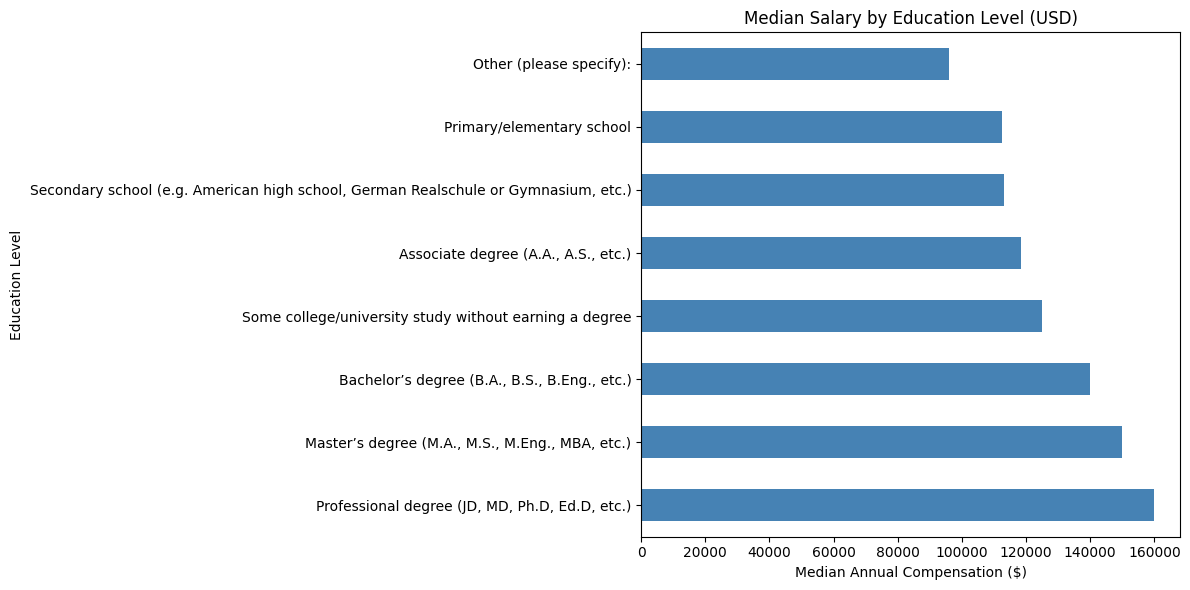


Median Salary by Education Level:
EdLevel
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        160000.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       150000.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          140000.0
Some college/university study without earning a degree                                125000.0
Associate degree (A.A., A.S., etc.)                                                   118500.0
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    113000.0
Primary/elementary school                                                             112500.0
Other (please specify):                                                                96000.0
Name: CompTotal, dtype: float64


In [29]:
# Salary by education level
if len(df_salary_usd) > 0:
    salary_by_ed = df_salary_usd.groupby('EdLevel')['CompTotal'].median().sort_values(ascending=False)
    
    if len(salary_by_ed) > 0:
        plt.figure(figsize=(12, 6))
        salary_by_ed.plot(kind='barh', color='steelblue')
        plt.title('Median Salary by Education Level (USD)')
        plt.xlabel('Median Annual Compensation ($)')
        plt.ylabel('Education Level')
        plt.tight_layout()
        plt.show()
        
        print("\nMedian Salary by Education Level:")
        print(salary_by_ed)
    else:
        print("No education level data available.")
else:
    print("No USD salary data available for analysis.")

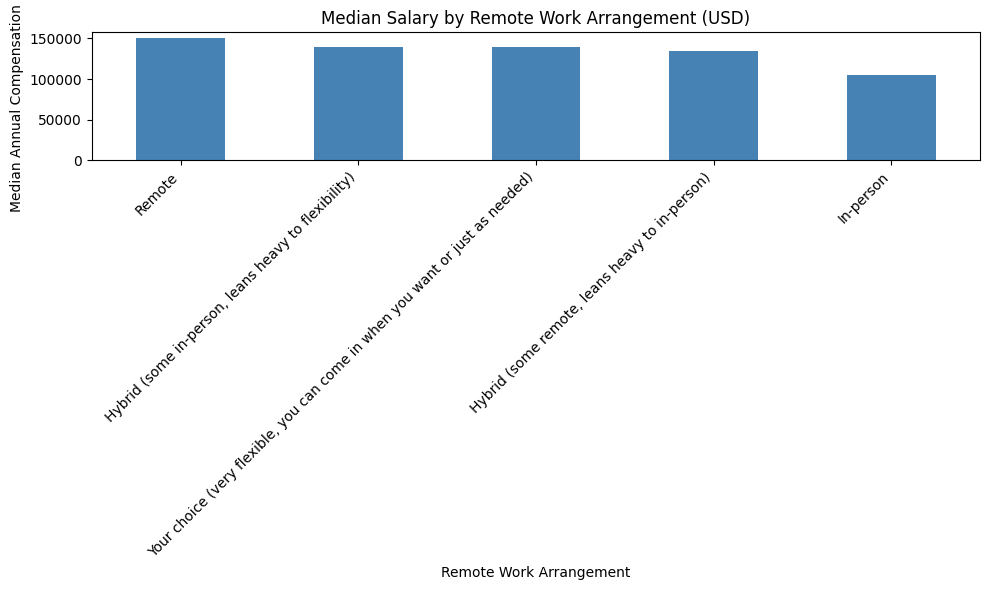


Median Salary by Remote Work:
RemoteWork
Remote                                                                          150000.0
Hybrid (some in-person, leans heavy to flexibility)                             140000.0
Your choice (very flexible, you can come in when you want or just as needed)    140000.0
Hybrid (some remote, leans heavy to in-person)                                  135000.0
In-person                                                                       105000.0
Name: CompTotal, dtype: float64


In [30]:
# Salary by remote work arrangement
if len(df_salary_usd) > 0:
    salary_by_remote = df_salary_usd.groupby('RemoteWork')['CompTotal'].median().sort_values(ascending=False)
    
    if len(salary_by_remote) > 0:
        plt.figure(figsize=(10, 6))
        salary_by_remote.plot(kind='bar', color='steelblue')
        plt.title('Median Salary by Remote Work Arrangement (USD)')
        plt.xlabel('Remote Work Arrangement')
        plt.ylabel('Median Annual Compensation ($)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
        
        print("\nMedian Salary by Remote Work:")
        print(salary_by_remote)
    else:
        print("No remote work data available.")
else:
    print("No USD salary data available for analysis.")

### Question 4: What drives AI tool adoption among developers?

In [31]:
# Select relevant columns
ai_cols = ['AISelect', 'Age', 'EdLevel', 'WorkExp', 'YearsCode', 'DevType', 'Industry']
df_ai = clean_data(df, ai_cols)

Original shape: (49191, 172)
Cleaned shape: (28551, 7)
Rows removed: 20,640


AI Tool Usage Distribution:
AISelect
Yes, I use AI tools daily                      13889
Yes, I use AI tools weekly                      5110
No, and I don't plan to                         4275
Yes, I use AI tools monthly or infrequently     3854
No, but I plan to soon                          1423
Name: count, dtype: int64


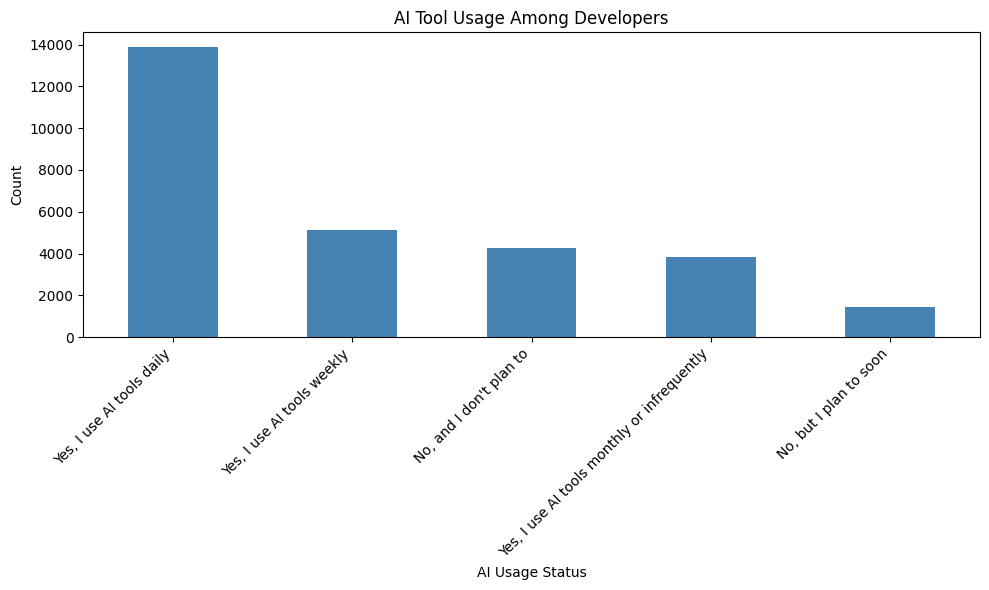

In [32]:
# AI tool usage distribution
print("AI Tool Usage Distribution:")
print(df_ai['AISelect'].value_counts())

plt.figure(figsize=(10, 6))
df_ai['AISelect'].value_counts().plot(kind='bar', color='steelblue')
plt.title('AI Tool Usage Among Developers')
plt.xlabel('AI Usage Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

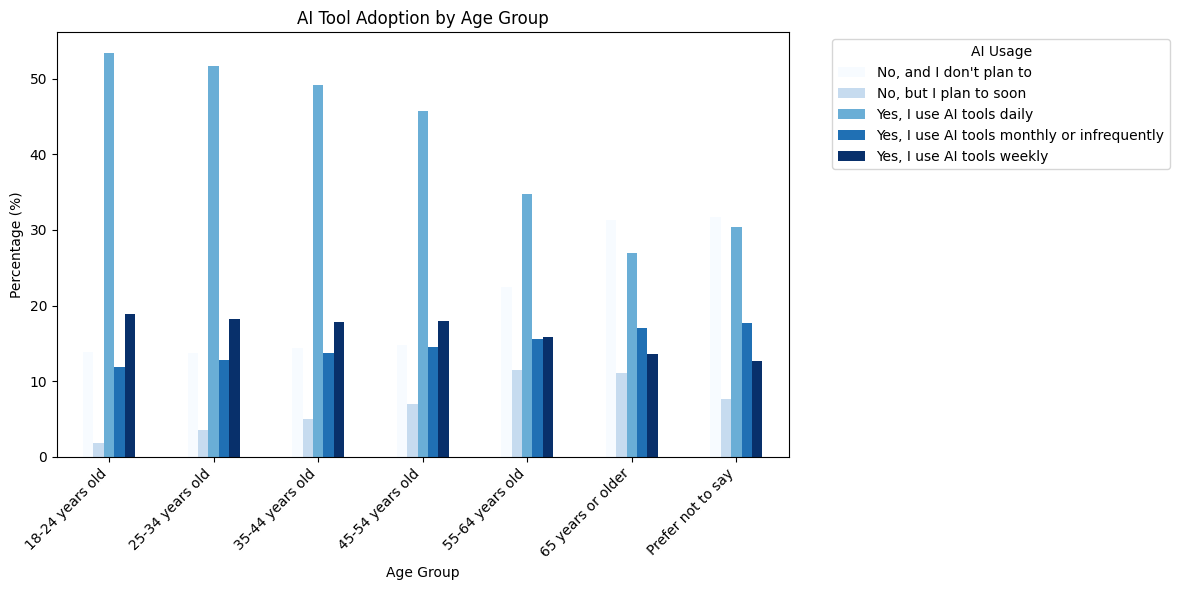

In [33]:
# AI adoption by age
ai_by_age = pd.crosstab(df_ai['Age'], df_ai['AISelect'], normalize='index') * 100

plt.figure(figsize=(12, 6))
ai_by_age.plot(kind='bar', figsize=(12, 6), colormap='Blues')
plt.title('AI Tool Adoption by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='AI Usage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

---

## 5. Evaluation

### Model Performance Summary

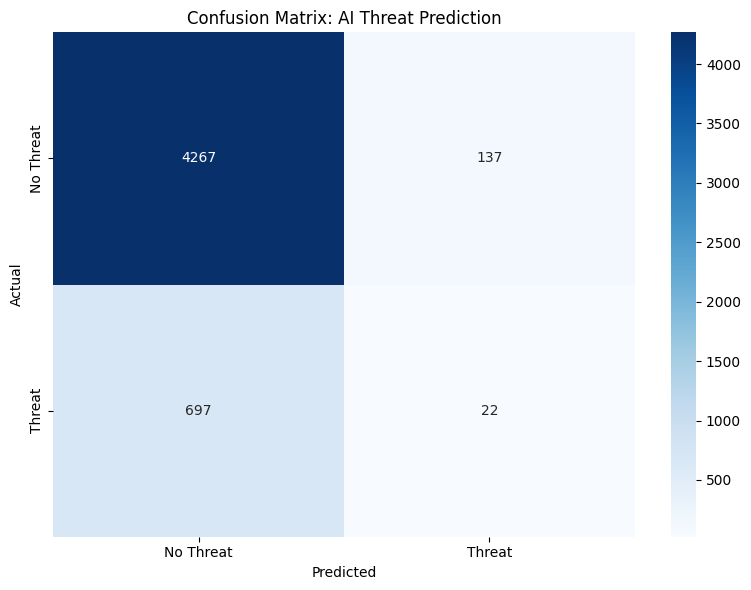

In [34]:
# Confusion matrix for AI Threat prediction model
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Threat', 'Threat'],
            yticklabels=['No Threat', 'Threat'])
plt.title('Confusion Matrix: AI Threat Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

---

## 6. Prediction Scenario

### Scenario: Predicting AI Threat Perception for a New Developer

Let's imagine a developer with the following profile:
- Age: 25-34 years old
- Education: Bachelor's degree
- Work Experience: 5 years
- Years Coding: 8 years
- Remote Work: Hybrid
- Currently uses AI tools
- Developer Type: Full-stack developer

In [35]:
# Create a sample developer profile and make a prediction

def predict_ai_threat(model, encoders, age, education, work_exp, years_code,
                      remote_work, ai_select, dev_type):
    """
    Predict whether a developer will perceive AI as a job threat.

    Parameters:
    -----------
    model : trained classifier
    encoders : dict of LabelEncoders
    [other params] : developer profile attributes

    Returns:
    --------
    prediction and probability
    """
    try:
        age_enc = encoders['Age'].transform([age])[0]
        ed_enc = encoders['EdLevel'].transform([education])[0]
        remote_enc = encoders['RemoteWork'].transform([remote_work])[0]
        ai_enc = encoders['AISelect'].transform([ai_select])[0]
        dev_enc = encoders['DevType'].transform([dev_type])[0]

        features = np.array([[age_enc, ed_enc, work_exp, years_code,
                             remote_enc, ai_enc, dev_enc]])

        prediction = model.predict(features)[0]
        probability = model.predict_proba(features)[0]

        return prediction, probability
    except Exception as e:
        print(f"Error in prediction: {e}")
        return None, None

# Get sample values from the data for prediction
print("Sample values available for prediction:")
print(f"\nAge options: {df_ai_threat['Age'].unique()[:3]}")
print(f"Education options: {df_ai_threat['EdLevel'].unique()[:3]}")
print(f"Remote Work options: {df_ai_threat['RemoteWork'].unique()[:3]}")
print(f"AI Select options: {df_ai_threat['AISelect'].unique()[:3]}")

# Make a prediction for a hypothetical developer
sample_age = df_ai_threat['Age'].mode()[0]
sample_ed = df_ai_threat['EdLevel'].mode()[0]
sample_remote = df_ai_threat['RemoteWork'].mode()[0]
sample_ai = df_ai_threat['AISelect'].mode()[0]
sample_dev = df_ai_threat['DevType'].mode()[0]

print(f"\n--- Prediction Scenario ---")
print(f"Developer Profile:")
print(f"  Age: {sample_age}")
print(f"  Education: {sample_ed}")
print(f"  Work Experience: 5 years")
print(f"  Years Coding: 8 years")
print(f"  Remote Work: {sample_remote}")
print(f"  AI Tool Usage: {sample_ai}")
print(f"  Developer Type: {sample_dev}")

prediction, proba = predict_ai_threat(
    rf_classifier, ai_encoders,
    age=sample_age,
    education=sample_ed,
    work_exp=5,
    years_code=8,
    remote_work=sample_remote,
    ai_select=sample_ai,
    dev_type=sample_dev
)

if prediction is not None:
    print(f"\nPrediction: {'Sees AI as a threat' if prediction == 1 else 'Does NOT see AI as a threat'}")
    print(f"Confidence: {max(proba)*100:.1f}%")
    print(f"Probability breakdown: No Threat={proba[0]:.3f}, Threat={proba[1]:.3f}")

Sample values available for prediction:

Age options: ['25-34 years old' '35-44 years old' '18-24 years old']
Education options: ['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Associate degree (A.A., A.S., etc.)'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)']
Remote Work options: ['Remote' 'Hybrid (some in-person, leans heavy to flexibility)'
 'Hybrid (some remote, leans heavy to in-person)']
AI Select options: ['Yes, I use AI tools monthly or infrequently'
 'Yes, I use AI tools weekly' 'Yes, I use AI tools daily']

--- Prediction Scenario ---
Developer Profile:
  Age: 25-34 years old
  Education: Bachelor’s degree (B.A., B.S., B.Eng., etc.)
  Work Experience: 5 years
  Years Coding: 8 years
  Remote Work: Remote
  AI Tool Usage: Yes, I use AI tools daily
  Developer Type: Developer, full-stack

Prediction: Does NOT see AI as a threat
Confidence: 90.3%
Probability breakdown: No Threat=0.903, Threat=0.097


---

## 7. Conclusions

### Key Findings

1. **AI Threat Perception:** Only ~13% of developers (3,437 out of 25,612) perceive AI as a threat to their job. The most important predictors were years of coding experience, work experience, and current AI tool usage. Interestingly, developers who already use AI tools daily are less likely to see AI as a threat.

2. **Remote Work and Job Satisfaction:** There is relatively little variation in job satisfaction across different remote work arrangements. The mean satisfaction score hovers around 6.5-7.0 on a 0-10 scale across all work arrangements, suggesting that remote work flexibility alone is not a major driver of job satisfaction.

3. **Salary Factors:** Among US-based developers earning in USD (n=5,893), the median salary is $140,000 with significant variation by education level and remote work arrangement. Higher education levels generally correlate with higher salaries.

4. **AI Tool Adoption:** The vast majority of developers are now using AI tools, with daily users being the largest group. AI adoption is relatively consistent across age groups, though younger developers (18-24) show slightly higher adoption rates.

### Model Performance

- The Random Forest classifier achieved an **accuracy of 83.7%** in predicting AI threat perception
- However, due to class imbalance (87% vs 13%), the model has low recall for the minority class (threat perception)
- The most important features for prediction were: **YearsCode, WorkExp, DevType, AISelect, Age**

### Limitations

- Survey data is self-reported and may contain biases
- Missing data reduced the sample size for some analyses (e.g., 25,612 complete responses for AI threat analysis out of 53,921 total)
- Salary analysis was limited to USD for consistency (5,893 respondents)
- Class imbalance affects the model's ability to predict the minority class accurately

### Future Work

- Address class imbalance using techniques like SMOTE or class weights
- Build regression models to predict salary based on developer characteristics
- Explore time series trends across multiple survey years
- Analyze specific technologies and their correlation with salary and job satisfaction

---

## References

- [Stack Overflow Developer Survey 2025](https://survey.stackoverflow.co/2025/)
- [CRISP-DM Methodology](https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining)